In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Create a set of random longitude and latitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.00, high = 180.00, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [4]:
#Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=411052a4625684b086d27e306d6abdd8


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | ballymena
Processing Record 3 of Set 1 | awjilah
Processing Record 4 of Set 1 | young
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | omboue
Processing Record 15 of Set 1 | rungata
City not found. Skipping...
Processing Record 16 of Set 1 | olafsvik
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | dolores
Processing Record 19 of Set 1 | buala
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | kargasok
Processing Record 22 of Set 1 | dingle
Processing Record 23 

Processing Record 37 of Set 4 | donskoye
Processing Record 38 of Set 4 | nanortalik
Processing Record 39 of Set 4 | lebedinyy
Processing Record 40 of Set 4 | ayan
Processing Record 41 of Set 4 | waverley
Processing Record 42 of Set 4 | ust-tsilma
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | giyon
Processing Record 45 of Set 4 | le vauclin
Processing Record 46 of Set 4 | bukama
Processing Record 47 of Set 4 | barranca
Processing Record 48 of Set 4 | henties bay
Processing Record 49 of Set 4 | tartagal
Processing Record 50 of Set 4 | necochea
Processing Record 1 of Set 5 | jumla
Processing Record 2 of Set 5 | solnechnyy
Processing Record 3 of Set 5 | comodoro rivadavia
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | erenhot
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | axim
Processing Record 8 of Set 5 | qovlar
Processing Record 9 of Set 5 | vinh
Processing Record 10 of Set 5 | varberg
Processing Record

Processing Record 25 of Set 8 | pudozh
Processing Record 26 of Set 8 | cody
Processing Record 27 of Set 8 | oranjemund
Processing Record 28 of Set 8 | puerto leguizamo
Processing Record 29 of Set 8 | rovnoye
Processing Record 30 of Set 8 | manokwari
Processing Record 31 of Set 8 | williston
Processing Record 32 of Set 8 | bayanday
Processing Record 33 of Set 8 | kahului
Processing Record 34 of Set 8 | sergeyevka
Processing Record 35 of Set 8 | araouane
Processing Record 36 of Set 8 | camacha
Processing Record 37 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 8 | airai
Processing Record 39 of Set 8 | maraa
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | krasnaya gora
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | carnarvon
Processing Record 44 of Set 8 | cairns
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | liverpool
Processing Record 47 of Set 8 | cotonou
Processing Re

Processing Record 13 of Set 12 | alugan
Processing Record 14 of Set 12 | alofi
Processing Record 15 of Set 12 | lasa
Processing Record 16 of Set 12 | valparaiso
Processing Record 17 of Set 12 | borogontsy
Processing Record 18 of Set 12 | port moresby
Processing Record 19 of Set 12 | xining
Processing Record 20 of Set 12 | alta floresta
Processing Record 21 of Set 12 | krasnyy chikoy
Processing Record 22 of Set 12 | gornyy
Processing Record 23 of Set 12 | kenai
Processing Record 24 of Set 12 | killarney
Processing Record 25 of Set 12 | knysna
Processing Record 26 of Set 12 | uplawmoor
Processing Record 27 of Set 12 | thurso
Processing Record 28 of Set 12 | harper
Processing Record 29 of Set 12 | lodja
Processing Record 30 of Set 12 | goderich
Processing Record 31 of Set 12 | antequera
Processing Record 32 of Set 12 | puerto escondido
Processing Record 33 of Set 12 | panguipulli
Processing Record 34 of Set 12 | pitkyaranta
Processing Record 35 of Set 12 | madang
Processing Record 36 of S

In [11]:
len(city_data)

563

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,39.85,85,47,10.42,RU,2021-07-27 22:38:40
1,Ballymena,54.8636,-6.2763,57.02,98,100,4.32,GB,2021-07-27 22:38:40
2,Awjilah,29.1081,21.2869,82.26,34,0,8.48,LY,2021-07-27 22:38:41
3,Young,-32.6833,-57.6333,46.22,67,6,7.40,UY,2021-07-27 22:38:41
4,Qaanaaq,77.4840,-69.3632,41.77,99,100,5.95,GL,2021-07-27 22:38:41
5,Hermanus,-34.4187,19.2345,55.80,75,88,15.70,ZA,2021-07-27 22:38:41
6,Fairbanks,64.8378,-147.7164,66.54,65,90,1.01,US,2021-07-27 22:36:46
7,Jamestown,42.0970,-79.2353,77.29,65,90,1.01,US,2021-07-27 22:35:22
8,Arraial Do Cabo,-22.9661,-42.0278,78.76,65,0,4.61,BR,2021-07-27 22:34:51
9,Bethel,41.3712,-73.4140,86.11,64,1,11.50,US,2021-07-27 22:38:42


In [13]:
new_column_order =["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-07-27 22:38:40,71.6872,128.8694,39.85,85,47,10.42
1,Ballymena,GB,2021-07-27 22:38:40,54.8636,-6.2763,57.02,98,100,4.32
2,Awjilah,LY,2021-07-27 22:38:41,29.1081,21.2869,82.26,34,0,8.48
3,Young,UY,2021-07-27 22:38:41,-32.6833,-57.6333,46.22,67,6,7.40
4,Qaanaaq,GL,2021-07-27 22:38:41,77.4840,-69.3632,41.77,99,100,5.95
...,...,...,...,...,...,...,...,...,...
558,Madimba,TZ,2021-07-27 22:40:50,-10.4000,40.3333,70.59,86,2,10.40
559,Nuristan,AF,2021-07-27 22:40:51,35.3000,70.8333,52.41,60,8,8.43
560,Wanning,CN,2021-07-27 22:40:51,18.8003,110.3967,81.79,80,100,8.37
561,Baoqing,CN,2021-07-27 22:40:51,46.3317,132.2111,89.49,43,42,2.08


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

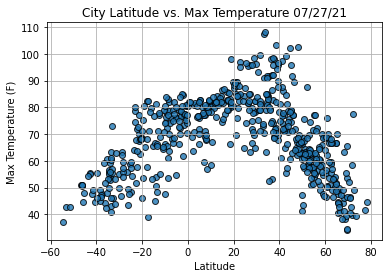

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

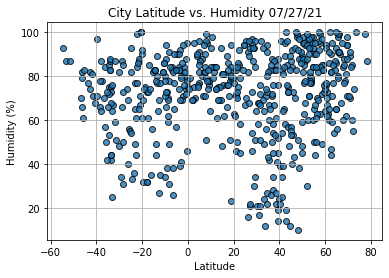

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

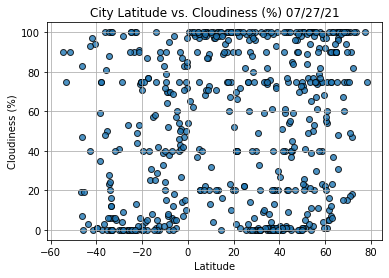

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()